Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
#original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')
original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_3\\Melbourne\\Melbourne_housing_FULL-26-09-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26/08/2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26/08/2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26/08/2017,6.3,3013.0,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


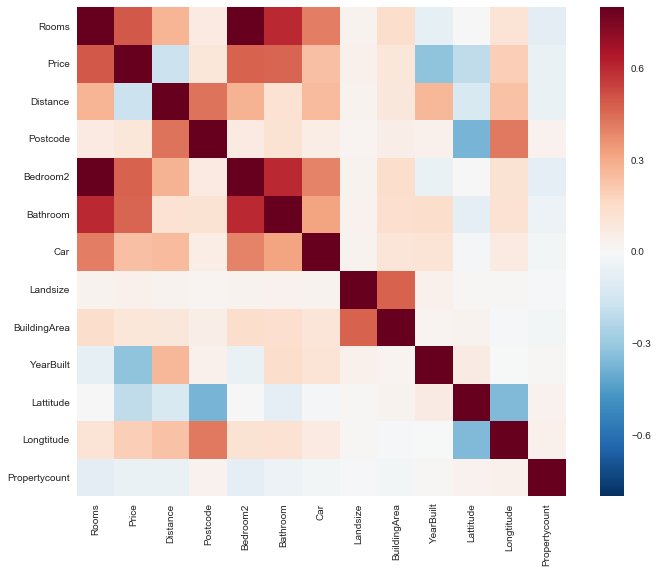

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Converting Suburb into values based on categories
data['Suburb'] = data['Suburb'].astype('category')
data['Suburb'] = data['Suburb'].cat.codes
#data.head()
data['Suburb'].nunique()

336

In [10]:
# Converting dates to datetime64
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
################# Is this necessary?
# Converting YearBuilt to datetime64
#data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format = '%Y')
#data['YearBuilt'] = data['YearBuilt'].dt.year

In [12]:
# Converting each housing type into a binary value
data['house'] = False
data.loc[data['Type'] == 'h', 'house'] = True
data['unit'] = False
data.loc[data['Type'] == 'u', 'unit'] = True
data['townhouse'] = False
data.loc[data['Type'] == 't', 'townhouse'] = True

In [25]:
new_data = data[['Suburb', 'house', 'unit', 'townhouse', 'Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
new_data

,Suburb,house,unit,townhouse,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,True,False,False,2,9.993525e+05,1.000000,1.0,126.0,NaN,NaN
1,0,True,False,False,2,1.480000e+06,1.000000,1.0,202.0,NaN,NaN
2,0,True,False,False,2,1.035000e+06,1.000000,0.0,156.0,79.0,1900.0
3,0,False,True,False,3,9.550496e+05,2.000000,1.0,0.0,NaN,NaN
4,0,True,False,False,3,1.465000e+06,2.000000,0.0,134.0,150.0,1900.0
5,0,True,False,False,3,8.500000e+05,2.000000,1.0,94.0,NaN,NaN
6,0,True,False,False,4,1.600000e+06,1.000000,2.0,120.0,142.0,2014.0
7,0,True,False,False,4,1.376223e+06,2.000000,2.0,400.0,220.0,2006.0
8,0,True,False,False,2,9.993525e+05,1.000000,2.0,201.0,NaN,1900.0
9,0,True,False,False,2,1.204482e+06,2.000000,1.0,202.0,NaN,1900.0


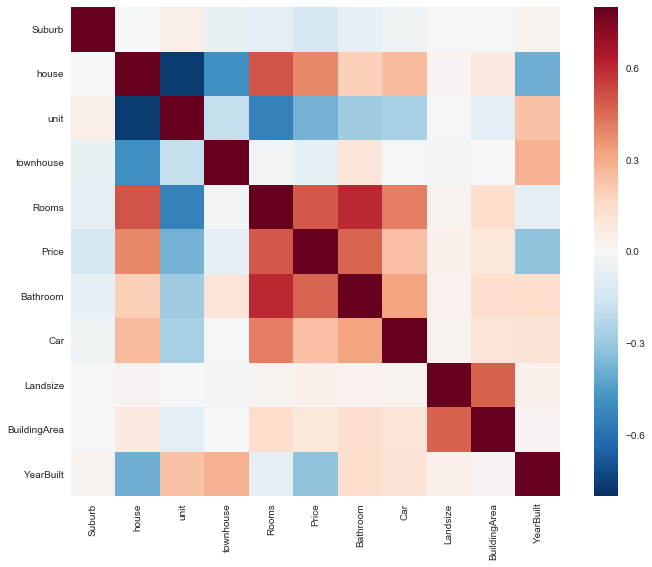

In [14]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Filling Missing Values
### Create a function that populates missing values by comparing them to values contained in a row of similar components. For example, a two bedroom, two bathroom townhouse with a missing price should have its price populated with the average price of other two bedroom, two bathroom townhouses. 

In [15]:
# Calculate the mean price for different groupings of house type, room count, and bathroom count.
# Check how many unique combinations there are
len(data.groupby(['house','unit','townhouse','Rooms','Bathroom']).agg({'Price':['mean']}))

85

In [23]:
# Fill the missing Bathroom counts
fill_bathrooms = data.groupby(['house', 'unit', 'townhouse', 'Rooms', 'Price'])['Bathroom'].apply(lambda x: x.fillna(x.mean()))
data['Bathroom'] = data.Bathroom.fillna(fill_bathrooms)
print(data)

       Suburb              Address  Rooms Type         Price Method  \
0           0        68 Studley St      2    h  9.993525e+05     SS   
1           0         85 Turner St      2    h  1.480000e+06      S   
2           0      25 Bloomburg St      2    h  1.035000e+06      S   
3           0   18/659 Victoria St      3    u  9.550496e+05     VB   
4           0         5 Charles St      3    h  1.465000e+06     SP   
5           0     40 Federation La      3    h  8.500000e+05     PI   
6           0          55a Park St      4    h  1.600000e+06     VB   
7           0         16 Maugie St      4    h  1.376223e+06     SN   
8           0         53 Turner St      2    h  9.993525e+05      S   
9           0         99 Turner St      2    h  1.204482e+06      S   
10          0       129 Charles St      2    h  9.410000e+05      S   
11          0         124 Yarra St      3    h  1.876000e+06      S   
12          0  121/56 Nicholson St      2    u  7.872602e+05     PI   
13    

In [19]:
# Fill missing prices with the mean price
cleaned_data = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom'])['Price'].apply(lambda x: x.fillna(x.mean()))
data['Price'] = data.Price.fillna(cleaned_data)
print(data)

       Suburb              Address  Rooms Type         Price Method  \
0           0        68 Studley St      2    h  9.993525e+05     SS   
1           0         85 Turner St      2    h  1.480000e+06      S   
2           0      25 Bloomburg St      2    h  1.035000e+06      S   
3           0   18/659 Victoria St      3    u  9.550496e+05     VB   
4           0         5 Charles St      3    h  1.465000e+06     SP   
5           0     40 Federation La      3    h  8.500000e+05     PI   
6           0          55a Park St      4    h  1.600000e+06     VB   
7           0         16 Maugie St      4    h  1.376223e+06     SN   
8           0         53 Turner St      2    h  9.993525e+05      S   
9           0         99 Turner St      2    h  1.204482e+06      S   
10          0       129 Charles St      2    h  9.410000e+05      S   
11          0         124 Yarra St      3    h  1.876000e+06      S   
12          0  121/56 Nicholson St      2    u  7.872602e+05     PI   
13    

In [24]:
# Check to see if there are any remaining nulls
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             1025
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          1839
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
house                0
unit                 0
townhouse            0
dtype: int64

# Creating the Model and Determining the Best Explanatory Features
### Gradient Boosting will allow for the determination of the best explanatory features

In [32]:
# To find best explanatory features, run the model with a dataset that has dropped any remaning na values
purged_data = new_data.dropna()
purged_data['Price'] = purged_data['Price'].astype(int)
print(len(purged_data))
X = purged_data.drop('Price', 1)
Y = purged_data['Price']

8883


C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
# 500 iterations, using 5-deep trees, and loss function 'deviance.'
# Play around with number of iterations
# Look into learning rate
params = {'n_estimators': 100,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X,Y)
y_pred = clf.fit(X,Y).predict(X)


# Print the accuracy of the model and store it in the table
print('Accuracy of the model:')
print(clf.score(X,Y))

C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:583: RuntimeWarning: overflow encountered in double_scalars
  tree.value[leaf, 0, 0] = numerator / denominator
C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:410: RuntimeWarning: invalid value encountered in subtract
  out = np.log(np.sum(np.exp(arr - vmax), axis=0))
C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:558: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-1 * sample_weight * (Y * pred).sum(axis=1) +


In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [17]:
X = new_data.drop('Price', 1)
Y = new_data['Price']